interactive(children=(Dropdown(description='Utilisateur:', options=('Ameth', 'Fatou', 'Modou'), value='Ameth')…

/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.draw()
/tmp/ipykernel_104736/3362617267.py:56: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


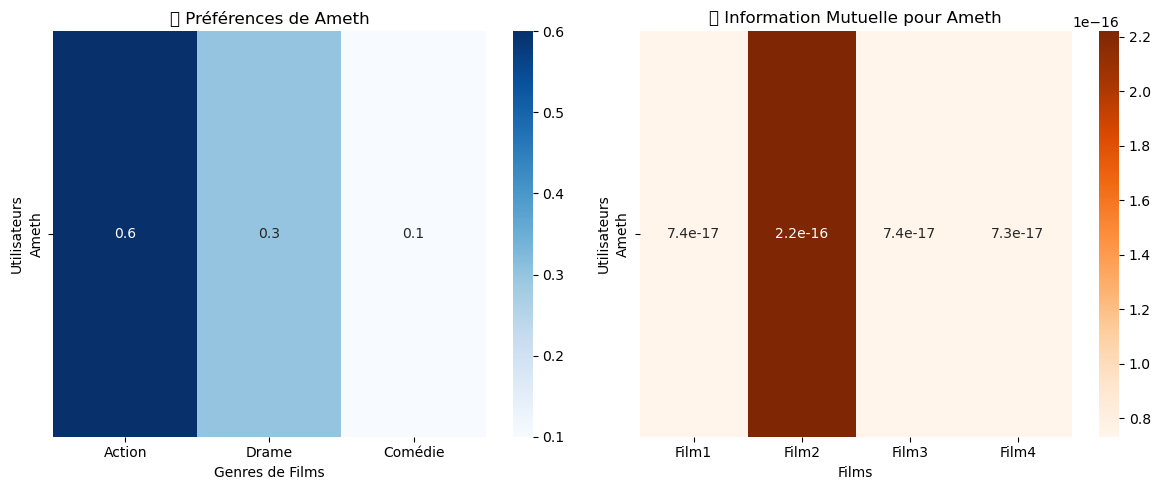

/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.draw()
/tmp/ipykernel_104736/3362617267.py:56: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()
/home/mg4/miniconda3/envs/Mg4_IA/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


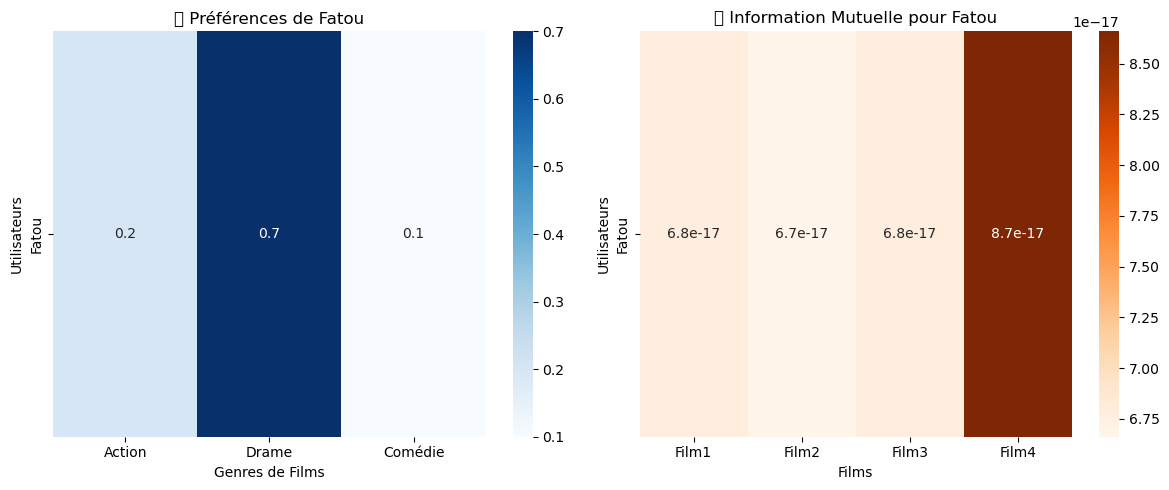

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
import ipywidgets as widgets
from IPython.display import display

# Données simulées : préférences utilisateur et caractéristiques des objets
users = ["Ameth", "Fatou", "Modou"]
items = ["Film1", "Film2", "Film3", "Film4"]

# Matrices de distribution (Probabilités des genres pour utilisateurs et objets)
PU = np.array([[0.6, 0.3, 0.1], [0.2, 0.7, 0.1], [0.1, 0.1, 0.8]])  # Utilisateurs
PO = np.array([[0.5, 0.3, 0.2], [0.1, 0.8, 0.1], [0.3, 0.2, 0.5], [0.2, 0.6, 0.2]])  # Objets

# Définition des labels pour les genres
genres = ["Action", "Drame", "Comédie"]

# Fonction pour calculer l'information mutuelle
def mutual_information(pu, po):
    pu = pu[:, np.newaxis]  # Transformer en matrice colonne (2D)
    po = po[np.newaxis, :]  # Transformer en matrice ligne (2D)

    joint_prob = pu * po  # Produit matriciel
    marginal_u = np.sum(joint_prob, axis=1, keepdims=True)
    marginal_o = np.sum(joint_prob, axis=0, keepdims=True)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        mi_matrix = joint_prob * np.log(joint_prob / (marginal_u * marginal_o))
        mi_matrix = np.nan_to_num(mi_matrix)  # Gérer les NaN
        
    return np.sum(mi_matrix)

# Calcul de l'information mutuelle avec valeur absolue
mi_scores = np.abs(np.array([[mutual_information(PU[u], PO[o]) for o in range(len(items))] for u in range(len(users))]))

# Fonction pour mettre à jour les graphiques en fonction de l'utilisateur sélectionné
def update_plots(selected_user):
    user_index = users.index(selected_user)
    
    # Heatmap des préférences de l'utilisateur sélectionné
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(PU[user_index].reshape(1, -1), annot=True, cmap="Blues", xticklabels=genres, yticklabels=[selected_user])
    plt.title(f"🔹 Préférences de {selected_user}")
    plt.xlabel("Genres de Films")
    plt.ylabel("Utilisateurs")
    
    # Heatmap des scores d'information mutuelle pour l'utilisateur sélectionné
    plt.subplot(1, 2, 2)
    sns.heatmap(mi_scores[user_index].reshape(1, -1), annot=True, cmap="Oranges", xticklabels=items, yticklabels=[selected_user])
    plt.title(f"🔹 Information Mutuelle pour {selected_user}")
    plt.xlabel("Films")
    plt.ylabel("Utilisateurs")
    
    plt.tight_layout()
    plt.show()

# Création d'un widget interactif pour sélectionner l'utilisateur
user_dropdown = widgets.Dropdown(options=users, description="Utilisateur:")
widgets.interact(update_plots, selected_user=user_dropdown)

# Affichage des graphiques initiaux
update_plots(users[0])
update_plots(users[1])
